In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(output_dim = 7, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3960 images belonging to 7 classes.
Found 1320 images belonging to 7 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 3960,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 1320)

Epoch 1/100
123/123 [==============================] - 1657s 13s/step - loss: 1.8174 - acc: 0.2836 - precision: 0.3662 - recall: 0.0331 - val_loss: 1.5663 - val_acc: 0.3597 - val_precision: 0.6445 - val_recall: 0.1259
Epoch 2/100
123/123 [==============================] - 1657s 13s/step - loss: 1.6324 - acc: 0.3472 - precision: 0.6525 - recall: 0.1001 - val_loss: 1.5113 - val_acc: 0.3832 - val_precision: 0.7453 - val_recall: 0.0802
Epoch 3/100
123/123 [==============================] - 1651s 13s/step - loss: 1.5414 - acc: 0.3697 - precision: 0.6421 - recall: 0.1265 - val_loss: 1.3138 - val_acc: 0.4828 - val_precision: 0.7455 - val_recall: 0.1762
Epoch 4/100
123/123 [==============================] - 1646s 13s/step - loss: 1.4518 - acc: 0.4129 - precision: 0.6677 - recall: 0.1653 - val_loss: 1.1823 - val_acc: 0.5292 - val_precision: 0.7655 - val_recall: 0.2221
Epoch 5/100
123/123 [==============================] - 1644s 13s/step - loss: 1.4149 - acc: 0.4359 - precision: 0.6629 - recall:

123/123 [==============================] - 1651s 13s/step - loss: 0.7031 - acc: 0.7157 - precision: 0.8005 - recall: 0.6325 - val_loss: 0.2672 - val_acc: 0.9258 - val_precision: 0.9566 - val_recall: 0.8818
Epoch 39/100
123/123 [==============================] - 1641s 13s/step - loss: 0.6862 - acc: 0.7399 - precision: 0.8120 - recall: 0.6585 - val_loss: 0.3404 - val_acc: 0.8880 - val_precision: 0.9320 - val_recall: 0.8418
Epoch 40/100
123/123 [==============================] - 1648s 13s/step - loss: 0.7081 - acc: 0.7265 - precision: 0.8015 - recall: 0.6358 - val_loss: 0.2550 - val_acc: 0.9333 - val_precision: 0.9529 - val_recall: 0.8916
Epoch 41/100
123/123 [==============================] - 1655s 13s/step - loss: 0.6474 - acc: 0.7530 - precision: 0.8225 - recall: 0.6766 - val_loss: 0.2541 - val_acc: 0.9234 - val_precision: 0.9541 - val_recall: 0.8970
Epoch 42/100
123/123 [==============================] - 1642s 13s/step - loss: 0.7083 - acc: 0.7232 - precision: 0.8093 - recall: 0.6342 

123/123 [==============================] - 1661s 14s/step - loss: 0.5010 - acc: 0.8176 - precision: 0.8560 - recall: 0.7721 - val_loss: 0.1092 - val_acc: 0.9713 - val_precision: 0.9816 - val_recall: 0.9652
Epoch 76/100
123/123 [==============================] - 1664s 14s/step - loss: 0.4912 - acc: 0.8172 - precision: 0.8626 - recall: 0.7702 - val_loss: 0.1229 - val_acc: 0.9583 - val_precision: 0.9720 - val_recall: 0.9522
Epoch 77/100
123/123 [==============================] - 1655s 13s/step - loss: 0.4896 - acc: 0.8133 - precision: 0.8614 - recall: 0.7677 - val_loss: 0.0859 - val_acc: 0.9773 - val_precision: 0.9823 - val_recall: 0.9689
Epoch 78/100
123/123 [==============================] - 1660s 13s/step - loss: 0.4831 - acc: 0.8196 - precision: 0.8660 - recall: 0.7738 - val_loss: 0.1171 - val_acc: 0.9628 - val_precision: 0.9736 - val_recall: 0.9508
Epoch 79/100
123/123 [==============================] - 1653s 13s/step - loss: 0.4837 - acc: 0.8214 - precision: 0.8653 - recall: 0.7754 

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      angry       0.11      0.10      0.11       165
    disgust       0.12      0.12      0.12       165
    fearful       0.15      0.15      0.15       165
      happy       0.14      0.14      0.14       165
    neutral       0.28      0.28      0.28       330
        sad       0.14      0.15      0.14       165
  surprised       0.17      0.16      0.16       165

avg / total       0.17      0.17      0.17      1320



Confusion matrix, without normalization
[[17 25 20 20 35 28 20]
 [22 19 21 21 38 22 22]
 [23 17 25 18 43 19 20]
 [17 18 25 23 42 22 18]
 [34 42 45 39 92 38 40]
 [23 16 21 18 47 24 16]
 [21 23 15 27 34 18 27]]


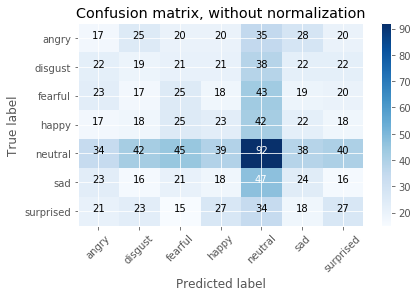

Normalized confusion matrix
[[10.303  15.1515 12.1212 12.1212 21.2121 16.9697 12.1212]
 [13.3333 11.5152 12.7273 12.7273 23.0303 13.3333 13.3333]
 [13.9394 10.303  15.1515 10.9091 26.0606 11.5152 12.1212]
 [10.303  10.9091 15.1515 13.9394 25.4545 13.3333 10.9091]
 [10.303  12.7273 13.6364 11.8182 27.8788 11.5152 12.1212]
 [13.9394  9.697  12.7273 10.9091 28.4848 14.5455  9.697 ]
 [12.7273 13.9394  9.0909 16.3636 20.6061 10.9091 16.3636]]


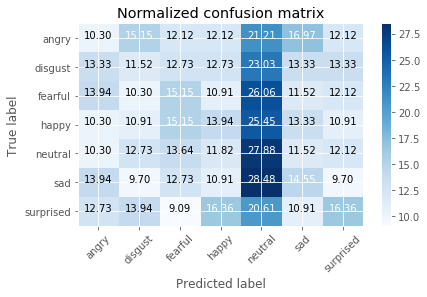

In [10]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn.png")
plt.show()

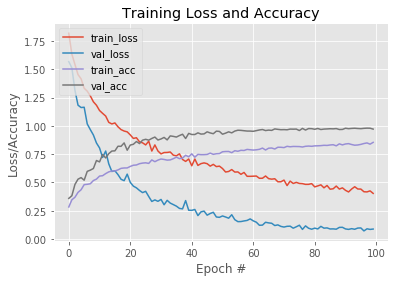

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn.png")